In [1]:
import nltk
import pandas as pd
import numpy as np

In [61]:
from PIL import Image

In [2]:
#nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/soyungalgo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
from nltk.tokenize import sent_tokenize, word_tokenize 
import gensim 
from gensim.models import Word2Vec 
from textblob import TextBlob

In [4]:
#  Reads text
sample = open("input/texto.txt") 
s = sample.read() 

In [5]:
trad = TextBlob(f"{s}")
en = str(trad.translate(from_lang="es",to="en"))

In [7]:
# Replaces escape character with space 
f = en.replace("\n", " ") 
  
data = [] 
  
# iterate through each sentence in the file 
for i in sent_tokenize(f): 
    temp = [] 
      
    # tokenize the sentence into words 
    for j in word_tokenize(i): 
        temp.append(j.lower()) 
          
    data.append(temp) 
# Create Skip Gram model 
model2 = gensim.models.Word2Vec(data, min_count = 1, size = 512*384, 
                                             window = 5, sg = 1) 


In [8]:
prueba = model2['light']

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [10]:
prueba.shape

(196608,)

In [11]:
prueba

array([-9.3306562e-07,  7.5374339e-07, -2.7218189e-06, ...,
       -1.3338853e-06,  1.1059171e-07,  2.1291812e-06], dtype=float32)

In [12]:
prueba.min()

-3.6553504e-06

In [13]:
prueba.max()

3.738722e-06

In [14]:
normalizado = ((prueba-prueba.max())*((0-991)/(prueba.min()-prueba.max())))+991

In [15]:
normalizado = normalizado.astype(int)

In [96]:
numerito = 992/(abs(prueba.max()-prueba.min()))

In [16]:
#normalizado.reshape(384,512)

In [17]:
colores = pd.read_csv("data/colores.csv")

In [98]:
normalizando +numerito

array([414621.47, 414958.4 , 415108.62, 414986.1 , 415013.4 , 415427.94,
       415125.8 , 415101.28, 415187.7 , 415476.03, 414859.9 , 414613.3 ,
       414797.47, 414732.34, 414790.7 , 415472.34, 414896.2 , 415274.72,
       414761.28, 414643.12, 415245.75, 414845.56, 414893.47, 415079.62,
       415262.3 , 414784.88, 415390.4 , 414733.75, 415256.12, 415299.56,
       415306.4 , 414776.4 , 414920.62, 415038.12, 415387.84, 415401.47,
       415203.7 , 415247.3 , 415044.12, 415433.75, 414849.06, 415252.78,
       415384.75, 414858.88, 415213.2 , 414734.97, 414729.7 , 414874.3 ,
       415005.9 , 415368.16, 415105.84, 414824.3 , 415045.6 , 414935.44,
       415442.62, 414895.12, 414611.88, 415276.3 , 414932.5 , 415235.38,
       414658.53, 415196.5 , 414894.84, 415373.62, 415456.66, 415206.  ,
       415079.5 , 415349.84, 414677.34, 415094.8 , 414704.56, 414719.25,
       415176.22, 415234.75, 415187.22, 415310.66, 414740.25, 415276.5 ,
       414694.06, 415232.4 , 414800.78, 414667.25, 

In [42]:
def funCapa(x,param):
    nuevo = []
    param = str(f"{param}")
    for a in x:
        b = colores.iloc[a][f"{param}"]
        nuevo.append(b)
    return nuevo
def arrayReshape(lista):
    array = np.asarray(lista)
    otro = array.reshape(384,512)
    return otro

In [46]:
r = "R"
capaR = funCapa(normalizado,r)
len(capaR)

196608

In [47]:
g = "G"
capaG = funCapa(normalizado,g)

In [48]:
b = "B"
capab = funCapa(normalizado,b)

In [54]:
rf, gf, bf = arrayReshape(capaR), arrayReshape(capaG), arrayReshape(capab)

In [56]:
capas = [rf,gf,bf]

In [62]:
imagen = np.stack(capas, axis=2).astype('uint8')

In [66]:
ayayay = Image.fromarray(imagen)
ayayay.save("prueba2.jpg")

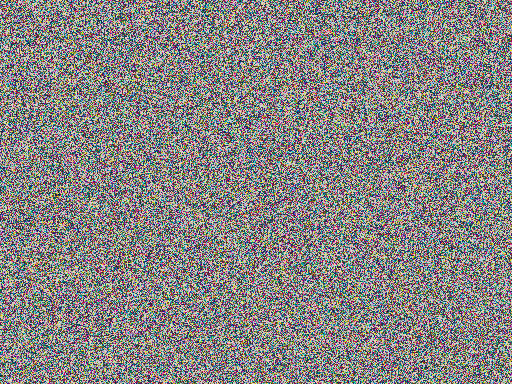